## GEOF213: Python Exercise 1
### Surface gravity waves
#### Haakon Ludvig Langeland Ervik

In this module, you will learn how to animate and plot waves in **python**. We will experiment with different wave parameters and see how this affects the resulting waves.

You will need to have software installed to open, read, and run Jupyter notebooks such as this one. The best way to do this is to install Anaconda from: https://docs.anaconda.com/anaconda/install. <br>
This notebook is opened by executing `jupyter notebook` from the your computers' terminal, which requires the package `jupyter` that can be installed by executing `conda install -c conda-forge jupyter` in the terminal.

To successfully run this notebook, you will also need to install the following packages: `numpy`, `matplotlib`, `ipython`. These can be installed individually:

`
conda install -c conda-forge numpy
conda install -c conda-forge matplotlib
conda install -c conda-forge ipython
`

or in one sweep, as follows:
`conda install -c conda-forge numpy matplotlib ipython`

_A few final notes:_
* **Run cells in this notebook by pressing** `Ctrl+Enter` (`Command+Enter` on Mac)
* **Double click markdown (text) cells to edit them**

#### Import python packages required for this notebook:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

#### Define wave parameters
The function `wave(L, T, A)` is used to create waves that we can visualize. The input parameters `L`, `T`, and `A` are provided by the user, which modifies the apperance of the resulting wave. The meaning of each parameter is documented in the function description.

In [2]:
def wave(L, T, A):
    """ Create a wave
    
    Parameters
    ----------
    L : float
        wavelength
    T : float
        wave period
    A : float
        wave amplitude
    """
    k = 2 * np.pi / L
    omega = 2 * np.pi / T
    def _wave(x, t):
        y = A * np.sin(k * x - omega * t)
        return y
    return _wave

#### Define waves to plot
Waves are plotted by adding them to the list `waves`. You can add as many waves as you'd like by adding an other entry to the list. Each wave is plotted along with the superposition of all waves combined.

In [3]:
waves = [
    wave(0.5,100,1.5),
    wave(0.7,175,1.8),  # Uncomment this line to add another wave to the animation.
]

#### Exercises
Work in pairs/groups and use the provided code to play with the wave parameters:

**Before** you watch the movie you produce, discuss with your friend(s) what the wave will look like. How will the changes you made affect the wave?

**After** you've watched the movie, briefly summarize what you saw. E.g., when I increased `L`, the wave ...

1. Change the size and sign of `L` and `T` (one at a time, to start with!).


2. Add two waves with different amplitude and wave number, but equal frequency.


3. Add two waves with equal amplitude and wave number, and where omega has equal magnitude but different sign.


4. Design a wave such that at least 20 wave crests are visible on the screen, and so that one wave crest travels across the screen within the timeframe of the film (400 s).


5. Add two waves with equal amplitude, wavelengths $L_1$, $L_2$, and periods $T_1$, $T_1$, where $L_1$ and $T_1$ are the ones from 4. and where $L_2=c_1\cdot L_1$ and $T_2=c_2\cdot T_1$, and $c_1=1.1$, $c_2=1.02$


6. Repeat 5., changing the magnitude and/or sign of c1 and c2.

In [4]:
def initial_figure(waves, x):
    fig, ax = plt.subplots(1, 1, figsize=(14,6))
    lines = []
    
    ax.set_xlim((0,2))
    ax.set_ylim((-4,4))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    
    for i, wave in enumerate(waves):
        lines.append(ax.plot(x, wave(x,0), label=f"Wave {i+1}"))
    
    if len(waves) > 1:
        superposition = np.sum(np.vstack([w(x, 0) for w in waves]), 0)
        lines.append(ax.plot(x, superposition, label="Superposition"))
    
    ax.legend(loc='upper right')
    
    return fig, lines

def animate(t, x, lines):
    for i, wave in enumerate(waves):
        lines[i][0].set_ydata(wave(x,t))
    
    if len(waves) > 1:
        superposition = np.sum(np.vstack([w(x, t) for w in waves]), 0)
        lines[-1][0].set_ydata(superposition)
    return lines

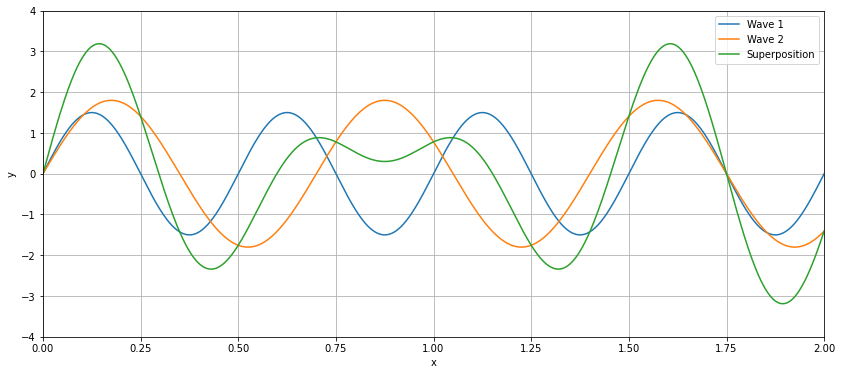

In [5]:
# Plot the initial state
x = np.linspace(0, 2, 1000)
fig, lines = initial_figure(waves, x)

Now let's make an animation to see how the wave(s) evolve in time.

In [6]:
ani = animation.FuncAnimation(fig, animate, frames=400, interval=20, fargs=(x, lines))
HTML(ani.to_html5_video())

Describe the results to each exercise in a few sentences.

<b> Answers: </b>
<div class="alert-block alert-warning">
    
1.
    
2.
    
3.
    
4.
    
5.
    
6.
</div>